# Business Understanding
Apartment in Victoria has different price. The Victorian Property Sales Report is released quarterly in March, June, September and December. It covers median sale prices by suburb for houses, units and vacant land over a period of 15 months. <br>

The report lists the percentage shift in median prices between quarters as well as the change over a 12-month period. An overall Melbourne metropolitan median sale price and country Victoria median sale price are also included for each property type.<br>

The Victorian Valuer-General provides a summary of activity and highlights where the most significant price changes have occurred.

# Data Understanding
The Dataset provides living area and conservation status.
There are 218 observations and 16 variables. <br>
**Download the dataset here** https://drive.google.com/open?id=1j8TdXtCnEQlqn2esDbiuPay01pDooS-w
# Objective
The Problem is to determine the best model and give the reason. <br>

Tony who has profession as a broker wants to predict apartment price in Victoria based on living area environment and apartment conservation status. Determine the best model to predict and redefine new conservation variable in 3 level, A = 1A, B = 2A, C = 2B and 3A.<br>

**Then, answer the questions**
1. Import Dataset: Load the dataset.
2. Exploratory Data Analysis: Create summary of the dataset, with python function. (mean, median, modus, max, min, range)
3. Data Visualization: Create any kind suitable plot of dataset, it will provide a lot of insight into the problem.
4. Variable Selection: Choose the variable and its reason.
5. Modelling: Create models using Regression
6. Accuracy or Error: Calculate the Error using the helper function from the library, from dataset only

#### *1. Import Dataset: Load the dataset*

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# import labelencoder
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")

# import modeling
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [2]:
df =  pd.read_csv('data/victoria.csv')
df.head()

,row.labels,totalprice,area,zone,category,age,floor,rooms,out,conservation,toilets,garage,elevator,streetcategory,heating,tras
0,1,228000,7530999756,Z45,4B,33,3,5,E100,2B,1,0,1,S3,3A,0
1,2,409000,1006500015,Z31,3B,5,7,5,E50,1A,2,1,1,S5,4A,1
2,3,200000,8887000275,Z52,3A,14,8,5,E50,1A,2,0,1,S2,3A,0
3,4,180000,6261000061,Z62,4A,41,3,4,E50,2A,1,0,0,S3,1A,0
4,5,443600,1461499939,Z31,3A,22,6,7,E100,1A,2,0,1,S4,4A,1


In [3]:
# to know the dimension of dataset
df.shape

(218, 16)

In [4]:
# missing value identification
df.isnull().sum()

row.labels        0
totalprice        0
area              0
zone              0
category          0
age               0
floor             0
rooms             0
out               0
conservation      0
toilets           0
garage            0
elevator          0
streetcategory    0
heating           0
tras              0
dtype: int64

In [5]:
# to know the information from dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 16 columns):
row.labels        218 non-null int64
totalprice        218 non-null object
area              218 non-null object
zone              218 non-null object
category          218 non-null object
age               218 non-null int64
floor             218 non-null int64
rooms             218 non-null int64
out               218 non-null object
conservation      218 non-null object
toilets           218 non-null int64
garage            218 non-null int64
elevator          218 non-null int64
streetcategory    218 non-null object
heating           218 non-null object
tras              218 non-null int64
dtypes: int64(8), object(8)
memory usage: 27.4+ KB


From the dataset we know that there is categorical and numerical data type. Then we split categorical and numerical data to facilitate the visualization

In [6]:
# clean the data
df['totalprice'] = df['totalprice'].replace(r'[,]','', regex=True)
df['area'] = df['area'].replace(r'[,]','', regex=True)

In [7]:
# change data to numeric
df['totalprice'] = pd.to_numeric(df['totalprice'])
# df['area'] = pd.to_numeric(df['area'])

In [8]:
#split data to numerical and categorical
category = ['totalprice','area','zone','category',
            'out','conservation','streetcategory','heating']
numerical  = df.drop(category, axis=1)
categorical = df[category]
numerical.head()

,row.labels,age,floor,rooms,toilets,garage,elevator,tras
0,1,33,3,5,1,0,1,0
1,2,5,7,5,2,1,1,1
2,3,14,8,5,2,0,1,0
3,4,41,3,4,1,0,0,0
4,5,22,6,7,2,0,1,1


In [9]:
categorical.head()

,totalprice,area,zone,category,out,conservation,streetcategory,heating
0,228000,7530999756,Z45,4B,E100,2B,S3,3A
1,409000,1006500015,Z31,3B,E50,1A,S5,4A
2,200000,8887000275,Z52,3A,E50,1A,S2,3A
3,180000,6261000061,Z62,4A,E50,2A,S3,1A
4,443600,1461499939,Z31,3A,E100,1A,S4,4A


In [10]:
#concat table categorical and numerical
dfconcat = pd.concat([categorical,numerical],axis=1)
dfconcat.head()

,totalprice,area,zone,category,out,conservation,streetcategory,heating,row.labels,age,floor,rooms,toilets,garage,elevator,tras
0,228000,7530999756,Z45,4B,E100,2B,S3,3A,1,33,3,5,1,0,1,0
1,409000,1006500015,Z31,3B,E50,1A,S5,4A,2,5,7,5,2,1,1,1
2,200000,8887000275,Z52,3A,E50,1A,S2,3A,3,14,8,5,2,0,1,0
3,180000,6261000061,Z62,4A,E50,2A,S3,1A,4,41,3,4,1,0,0,0
4,443600,1461499939,Z31,3A,E100,1A,S4,4A,5,22,6,7,2,0,1,1


In [11]:
# instantiate labelencoder object to encode the categorical data
le = LabelEncoder()

In [12]:
# apply le on categorical feature columns
dfconcat = dfconcat.apply(lambda col: le.fit_transform(col))
dfconcat

,totalprice,area,zone,category,out,conservation,streetcategory,heating,row.labels,age,floor,rooms,toilets,garage,elevator,tras
0,34,104,13,5,0,2,1,1,0,29,2,2,0,0,1,0
1,144,4,2,3,2,0,3,3,1,2,6,2,1,1,1,1
2,15,166,18,2,2,0,0,1,2,11,7,2,1,0,1,0
3,6,66,22,4,2,1,1,0,3,37,2,1,0,0,0,0
4,149,46,2,2,0,0,2,3,4,19,5,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,21,95,13,3,0,1,1,1,213,15,2,1,0,0,0,1
214,113,192,20,1,2,0,1,1,214,5,5,2,1,1,1,1
215,79,146,4,3,2,2,1,3,215,26,6,2,0,1,1,1
216,30,121,8,4,0,0,1,1,216,3,2,1,0,0,1,1


#### *2. Exploratory Data Analysis: Create summary of the dataset, with python function. (mean, median, modus, max, min, range)*

In [13]:
# to check the summary of the dataset
df.describe()

,row.labels,totalprice,age,floor,rooms,toilets,garage,elevator,tras
count,218.000000,2.180000e+02,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000
mean,109.500000,2.885435e+05,19.899083,4.440367,4.853211,1.467890,0.243119,0.798165,0.807339
std,63.075352,1.289723e+05,14.595590,2.126988,0.634285,0.500116,0.450881,0.402293,0.406787
min,1.000000,1.550000e+05,1.000000,1.000000,3.000000,1.000000,0.000000,0.000000,0.000000
25%,55.250000,2.300000e+05,11.000000,3.000000,5.000000,1.000000,0.000000,1.000000,1.000000
50%,109.500000,2.700000e+05,16.000000,4.000000,5.000000,1.000000,0.000000,1.000000,1.000000
75%,163.750000,3.297500e+05,24.000000,5.000000,5.000000,2.000000,0.000000,1.000000,1.000000
max,218.000000,1.889822e+06,118.000000,12.000000,7.000000,2.000000,2.000000,1.000000,2.000000


#### *3. Data Visualization: Create any kind suitable plot of dataset, it will provide a lot of insight into the problem.*

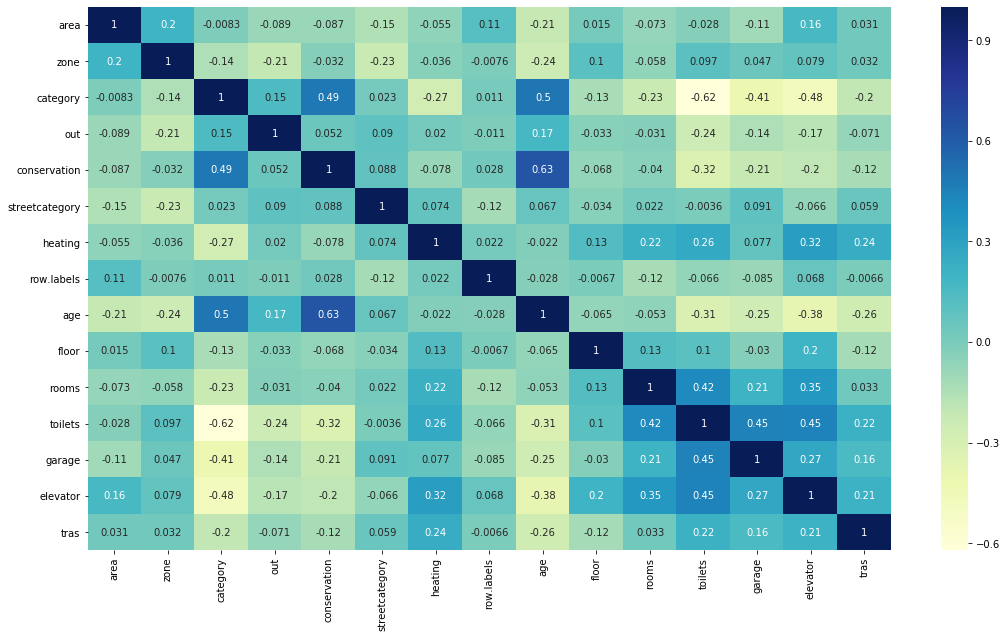

In [15]:
# visualization the correlation plot to know the correlation between features
plt.figure(figsize=(18,10))
sns.heatmap(dfconcat.iloc[:,1:16].corr(),annot=True, cmap="YlGnBu")

Based on the number of **correlation** from each features, we can know that the most powerful factor influencing apartment pricing (**total price**) as follows:
1. the number of **toilets**
2. the number of **elevator**
3. the number of **rooms**
4. the number of **garage** <br>

*Note: the more it has a dark color, the more it has a strong correlation*

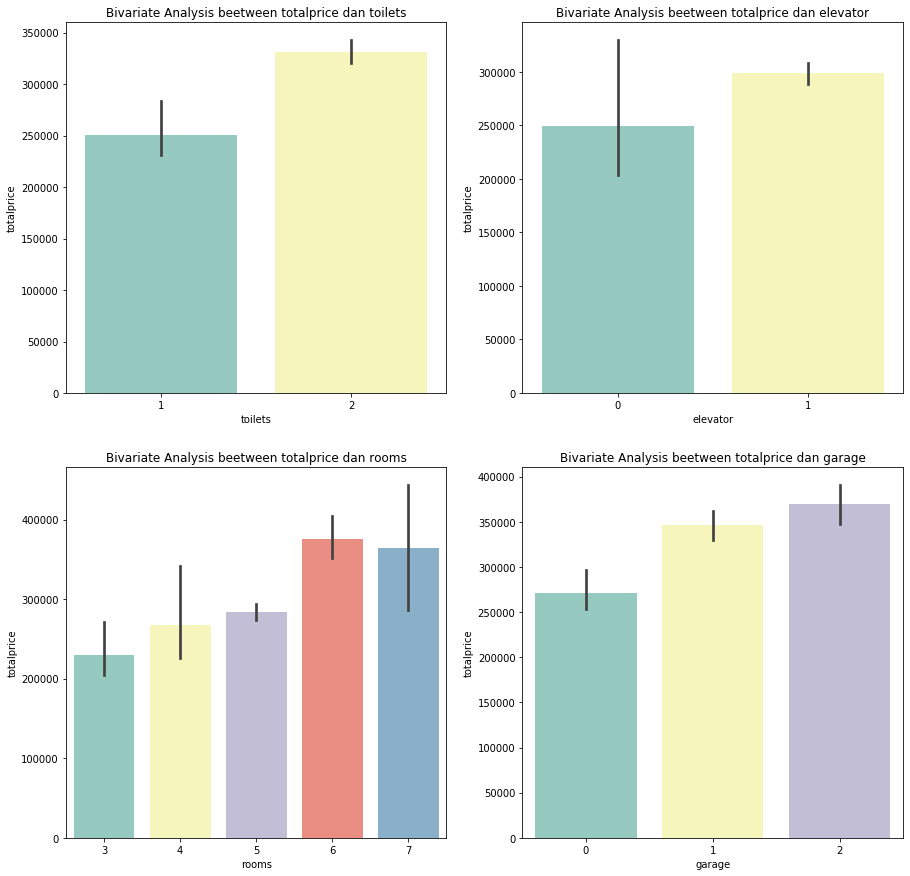

In [16]:
#Bivariate analysis
f=plt.figure(figsize=(15,15))

f.add_subplot(2,2,1)
sns.barplot(x='toilets', y='totalprice', data=df, palette="Set3")
plt.title('Bivariate Analysis beetween totalprice dan toilets')

f.add_subplot(2,2,2)
sns.barplot(x='elevator', y='totalprice', data=df, palette="Set3")
plt.title('Bivariate Analysis beetween totalprice dan elevator')

f.add_subplot(2,2,3)
sns.barplot(x='rooms', y='totalprice', data=df, palette="Set3")
plt.title('Bivariate Analysis beetween totalprice dan rooms')

f.add_subplot(2,2,4)
sns.barplot(x='garage', y='totalprice', data=df, palette="Set3")
plt.title('Bivariate Analysis beetween totalprice dan garage')

plt.show()

Based on the visualization, we can know that total price of apartment in Victoria influenced by the number of toilets, elevator, rooms, and garage. <br>
Then the price of more expensive apartments based on:
- the number of toilets are 2
- there is elevator
- the total number of rooms are 6, and
- garage can contain 2 vehicle 

In [17]:
#split data to numerical and categorical
categoryviz = ['category',
            'out','conservation','streetcategory','heating']
categoricalviz = df[categoryviz]
categoricalviz.head()

,category,out,conservation,streetcategory,heating
0,4B,E100,2B,S3,3A
1,3B,E50,1A,S5,4A
2,3A,E50,1A,S2,3A
3,4A,E50,2A,S3,1A
4,3A,E100,1A,S4,4A


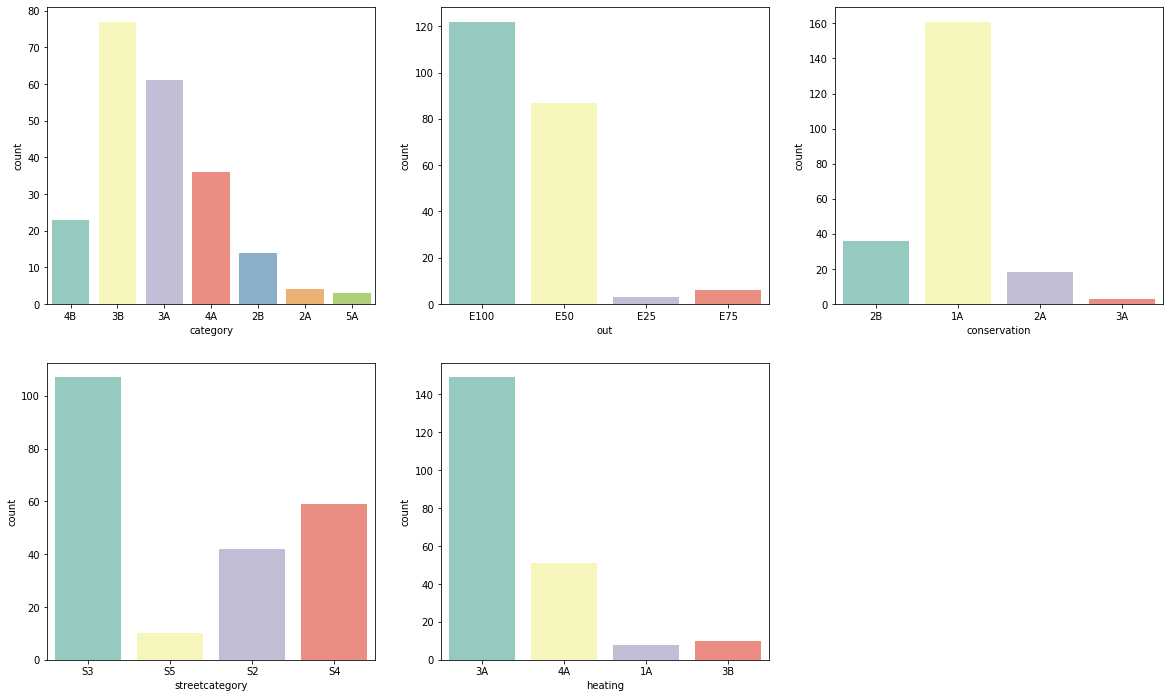

In [18]:
fig=plt.figure(figsize=(20,12))
axes=230
#put data categoricalviz
for cat in categoricalviz:
    axes += 1
    fig.add_subplot(axes)
    #set title of cat
    sns.countplot(data = categoricalviz, x=cat, palette="Set3") 
plt.show()

Based on the visualization we know that **the most category** is **3B**, **the most out** is **E100**, **the most convertion** is **1A**, **the most streetcategory** is **S3**, and **the most heating** is **3A**.

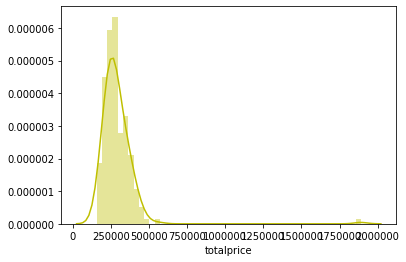

In [19]:
# univariate analysis price of apartment
sns.distplot(df['totalprice'], color="y")

Based on that visualization, we can find out that many apartments have prices **250000**.

#### *4. Variable Selection: Choose the variable and its reason.*
In this section, we select the numerical variable because want to load the model for machine learning. This dataframe is already numerical data type. We choose the variable which is considered not very necessary impact for total price partment in Victoria, that is **zone, category, out, streetcategory, heating, tras**.

In [30]:
dfselect = pd.read_csv('data/victoria.csv')
dropcol = ['zone', 'category', 'out', 'streetcategory', 'heating']
dfselect.drop(columns=dropcol, inplace=True)

In [31]:
dfselect.head()

,row.labels,totalprice,area,age,floor,rooms,conservation,toilets,garage,elevator,tras
0,1,228000,7530999756,33,3,5,2B,1,0,1,0
1,2,409000,1006500015,5,7,5,1A,2,1,1,1
2,3,200000,8887000275,14,8,5,1A,2,0,1,0
3,4,180000,6261000061,41,3,4,2A,1,0,0,0
4,5,443600,1461499939,22,6,7,1A,2,0,1,1


#### *5. Modelling: Create models using Regression*

In [22]:
# state the model
linear_regression = LinearRegression()

In [32]:
# state X and Y
X = dfselect.drop(columns= ['totalprice']) #select feature which has highest impact for TARGET
y = dfselect['totalprice']

In [33]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(174, 11) (174,)
(44, 11) (44,)


In [35]:
dfselect.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 11 columns):
row.labels      218 non-null int64
totalprice      218 non-null object
area            218 non-null object
age             218 non-null int64
floor           218 non-null int64
rooms           218 non-null int64
conservation    218 non-null object
toilets         218 non-null int64
garage          218 non-null int64
elevator        218 non-null int64
tras            218 non-null int64
dtypes: int64(8), object(3)
memory usage: 18.9+ KB


In [34]:
# training model
linear_regression.fit(X_train, y_train)

ValueError: could not convert string to float: '1A'